### 분류 모델 설명

* 사람의 뉴런을 닮은 심층 기반 신경망 (Neural Network)
    - input output 아웃풋 y는 인풋 x에 웨이트를 곱하고, 자신의 상태 b 에 따라 출력이 나갈지 말지 

* 최근 각광받는 앙상블
    - 하나의 분류기로 취약한 점을 여러개의 분류기를 합해 강력한 예측
    - 결정트리만 가지고 데이터를 다르게 할 것야
    - 결정트리만 사용해서 순차적으로 결정을 할거야 여러 다양한 방버 
* 현재 앙상블 방식 정형데이터에 대한 데이터 분석으로는 짱이다, 신경망, 딥러닝 학습등 저리가라. 

41p 결정트리 판단기준은 정보 균일도가 높은 데이터셋을 먼저 선택하도록 규칙을 생성

* iris 데이터 분류에서 45p  
페탈랭스만 보고 곧바로 세토사로 분류  
계속해서 가지치기 해 나가는 2진 분류 기법으로 연속적 분류   
* 지니계수가 낮은 속성을 기준으로 분할 (0이 평등, 1이 불평등)
* 엔트로피를 이용한 정보 이득 지수 1 - 엔트로피 지수



In [1]:
# graphviz 설치 

In [2]:
# 수업진행 


# 결정 트리 (Decision Tree)

In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [10]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=11

)

In [11]:
dtc = DecisionTreeClassifier(random_state=156)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

* 모델 시각화

In [12]:
from sklearn.tree import export_graphviz
export_graphviz(
    dtc, out_file='tree.dot',
    class_names=iris.target_names, feature_names=iris.feature_names,
    impurity=True, filled=True
)

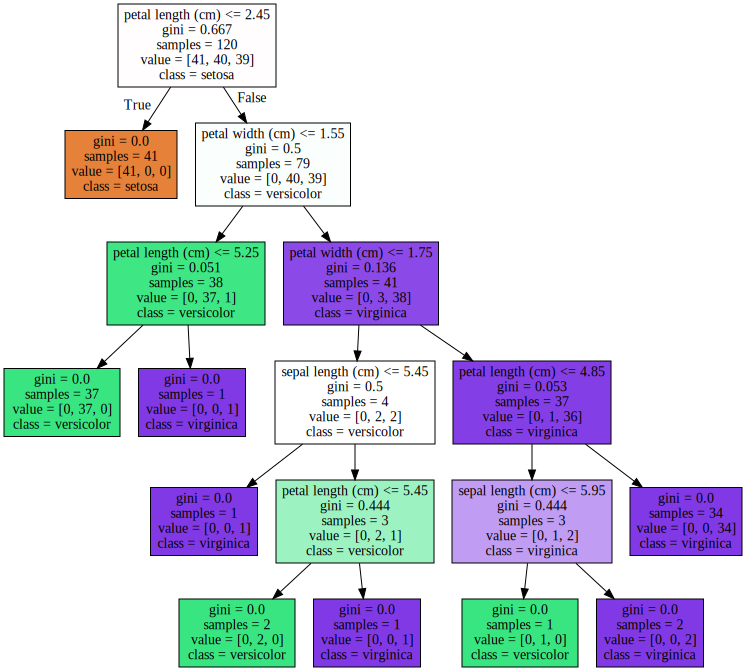

In [13]:
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

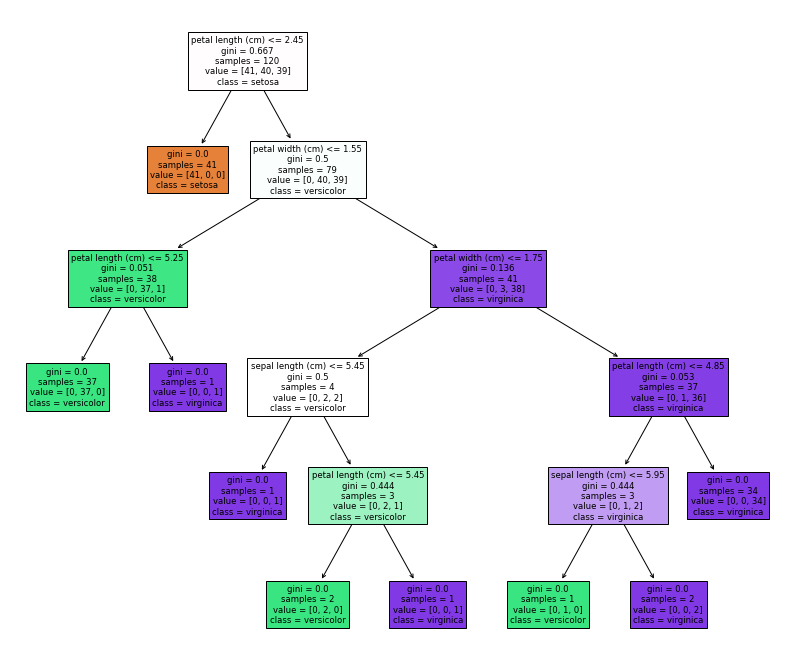

In [15]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt 

plt.figure(figsize=(14,12))
plot_tree(dtc, class_names=iris.target_names, feature_names=iris.feature_names, filled=True)
plt.show()


# 제약조건 
* max_depth = 3

In [16]:
dtc2 = DecisionTreeClassifier(max_depth=3, random_state=156)
dtc2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=156)

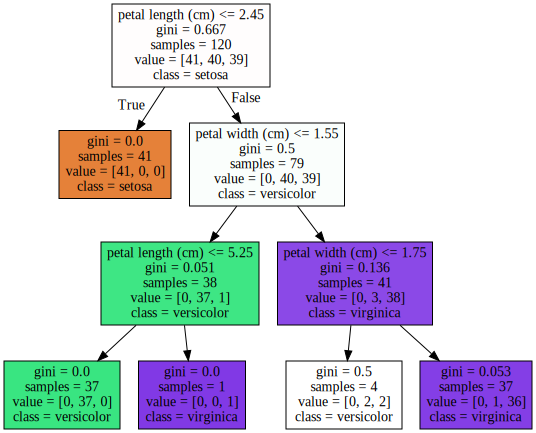

In [17]:
export_graphviz(
    dtc2, out_file='tree2.dot',
    class_names=iris.target_names, feature_names=iris.feature_names,
    impurity=True, filled=True
    )

with open('tree2.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

* min_samples_split = 4

In [18]:
dtc3 = DecisionTreeClassifier(min_samples_split=4, random_state=156)
dtc3.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=4, random_state=156)

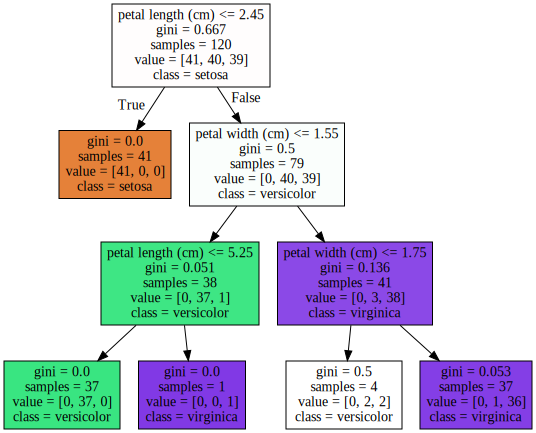

In [19]:
export_graphviz(
    dtc2, out_file='tree3.dot',
    class_names=iris.target_names, feature_names=iris.feature_names,
    impurity=True, filled=True
    )    
with open('tree3.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

* min_samples_leaf = 2 leaf가 되기 위한 최소한의 샘플 데이터 수

In [20]:
dtc4 = DecisionTreeClassifier(min_samples_leaf=2, random_state=156)
dtc4.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=2, random_state=156)

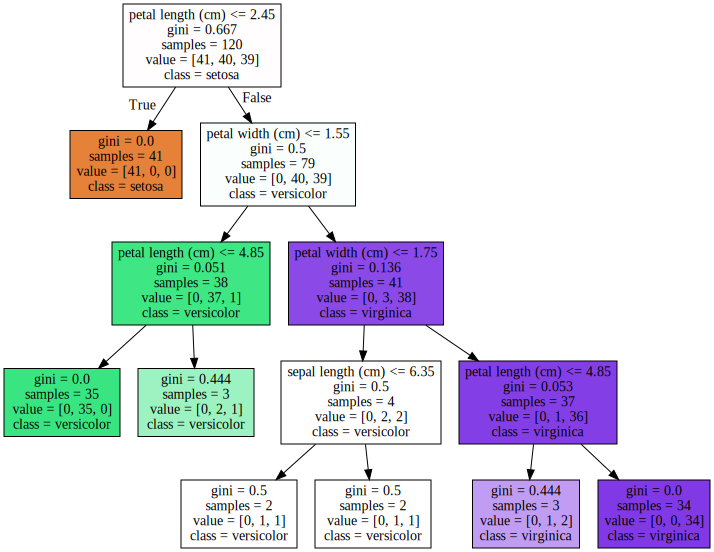

In [21]:
export_graphviz(
    dtc4, out_file='tree4.dot',
    class_names=iris.target_names, feature_names=iris.feature_names,
    impurity=True, filled=True
)
with open('tree4.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [23]:
# 3. Decision Tree Classifier의 파라미터
# 파라미터 명	설명
# min_samples_split	- 노드를 분할하기 위한 최소한의 샘플 데이터수 → 과적합을 제어하는데 사용
# - Default = 2 → 작게 설정할 수록 분할 노드가 많아져 과적합 가능성 증가
# min_samples_leaf	- 리프노드가 되기 위해 필요한 최소한의 샘플 데이터수
# - min_samples_split과 함께 과적합 제어 용도
# - 불균형 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 작게 설정 필요
# max_features	- 최적의 분할을 위해 고려할 최대 feature 개수
# - Default = None → 데이터 세트의 모든 피처를 사용
# - int형으로 지정 →피처 갯수 / float형으로 지정 →비중
# - sqrt 또는 auto : 전체 피처 중 √(피처개수) 만큼 선정
# - log : 전체 피처 중 log2(전체 피처 개수) 만큼 선정
# max_depth	- 트리의 최대 깊이
# - default = None
# → 완벽하게 클래스 값이 결정될 때 까지 분할
# 또는 데이터 개수가 min_samples_split보다 작아질 때까지 분할
# - 깊이가 깊어지면 과적합될 수 있으므로 적절히 제어 필요
# max_leaf_nodes	리프노드의 최대 개수

### 학습된 모델이 제공하는 정보

* Feature importance

In [24]:
dtc.feature_importances_
# 전체 합이 1
# 분류하는데 중요한 정보 뭐냐 

array([0.02500521, 0.        , 0.55490281, 0.42009198])

In [25]:
dtc2.feature_importances_

array([0.        , 0.        , 0.55810743, 0.44189257])

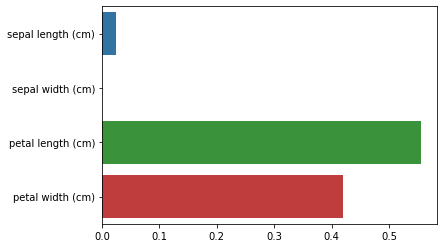

In [26]:
# 시각화  # 사이킷 런에서 학습 결과 돌려줄때 끝에 언더스코어 붙어 

import seaborn as sns
sns.barplot(x=dtc.feature_importances_, y=iris.feature_names)
plt.show()